In [127]:
from numpy import loadtxt, genfromtxt, shape, mean, sort, savetxt, size, array, copy
from pylab import figure
from matplotlib.pyplot import plot, savefig, xlabel, ylabel, scatter, axis, xlim, fill_between, legend, text, show
from sklearn.decomposition.pca import PCA
import pylab as plt
import numpy as np
import sys
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model

# Dimensionality reduction using Keras AutoEncoder

# Method

*Load and read data

*Design autoencoder Model

*Train Auto Encoder

*Use Encoder level from Auto Encoder

*Use Encoder to obtain reduced dimensionality data 

*Use decoder to obtain the reconstructed data 

In [128]:
%matplotlib inline

In [129]:

# read data
der = loadtxt('derivatives_all_epochs.dat')
encoded_train = pd.DataFrame(der)
encoded_train.head()

,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
0,-0.005201,-0.004614,-0.002545,0.000716,0.004247,0.006955,0.008081,0.007484,0.005628,0.003352,...,0.000765,0.000549,0.000332,0.000177,0.000109,0.000097,0.000077,0.000013,-0.000076,-0.000138
1,-0.002207,0.001210,0.005903,0.010225,0.012347,0.011309,0.007464,0.002194,-0.002793,-0.006206,...,0.000372,0.000281,0.000216,0.000190,0.000212,0.000280,0.000371,0.000442,0.000461,0.000428
2,-0.001937,0.001119,0.005535,0.010308,0.013761,0.014488,0.012114,0.007491,0.002269,-0.001912,...,0.000357,0.000294,0.000262,0.000249,0.000242,0.000241,0.000259,0.000304,0.000364,0.000419
3,-0.002083,0.003039,0.007768,0.010512,0.010545,0.008151,0.004267,0.000028,-0.003560,-0.005865,...,0.000216,0.000139,0.000099,0.000118,0.000186,0.000263,0.000304,0.000293,0.000248,0.000189
4,-0.005714,-0.005461,-0.004205,-0.001977,0.000851,0.003718,0.006036,0.007330,0.007360,0.006222,...,0.000113,0.000055,0.000050,0.000063,0.000063,0.000028,-0.000048,-0.000159,-0.000305,-0.000490


In [130]:
#shape of the given data

print('Train data shape', der.shape)
#finding the maximum and the minimum of the data
print('min, max',der.min(),der.max())

Train data shape (3677, 296)
min, max -0.0249818086590043 0.02830322628370948


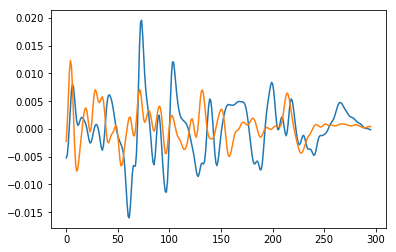

In [131]:
#plotting the first and second columns of the data

_ = plt.plot(der[0,:])
_ = plt.plot(der[1,:])

In [132]:
#Scaling Train for

#train_scaled = minmax_scale(der, axis = 0)
#train_scaled1 = minmax_scale(der, axis = 0)

#print(train_scaled.shape)

In [133]:
#_ = plt.plot(train_scaled[0,:])
#_ = plt.plot(der[0,:]/der[0,:].max())

# Reducing the data to 4 dimensions

In [134]:
# define the number of features
ncol = der.shape[1]

### Define the encoder dimension
encoding_dim = 4
#introducing an activation function
activation = 'sigmoid'
activation2='relu'

### Define  Deep Autoencoder model

In [135]:
input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(128, activation = activation2)(input_dim)
encoded2 = Dense(100, activation = activation2)(encoded1)
encoded3 = Dense(82, activation = activation2)(encoded2)
encoded4 = Dense(74, activation = activation2)(encoded3)
encoded11 = Dense(44, activation = activation2)(encoded4)
encoded12 = Dense(40, activation = activation2)(encoded11)
encoded13= Dense(35, activation = activation2)(encoded12)
encoded14 = Dense(30, activation = activation2)(encoded13)
encoded15 = Dense(24, activation = activation2)(encoded14)
encoded16 = Dense(8, activation = activation2)(encoded15)
encoded18 = Dense(5, activation = activation2)(encoded16)
encoded_middle = Dense(encoding_dim, activation = activation)(encoded18)

# Decoder Layers

decoded0 = Dense(5, activation = activation2)(encoded_middle)
decoded1 = Dense(8, activation = activation2)(decoded0)
decoded2 = Dense(24, activation = activation2)(decoded1)
decoded3 = Dense(30, activation = activation2)(decoded2)
decoded4 = Dense(35, activation = activation2)(decoded3)
decoded5 = Dense(40, activation = activation2)(decoded4)
decoded6 = Dense(44, activation = activation2)(decoded5)
decoded12 = Dense(74, activation = activation2)(decoded6)
decoded13 = Dense(82, activation = activation2)(decoded12)
decoded14 = Dense(100, activation = activation2)(decoded13)
decoded15 = Dense(128, activation = activation2)(decoded14)
decoded_out = Dense(ncol, activation = activation)(decoded15)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded_out)
#
middle  = Model(inputs =input_dim, outputs = encoded_middle)


# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')  #'adadelta--mse'

#
middle.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')     #binary_crossentropy

In [136]:
# summary of the whole autoencoder

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 296)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 128)               38016     
_________________________________________________________________
dense_98 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_99 (Dense)             (None, 82)                8282      
_________________________________________________________________
dense_100 (Dense)            (None, 74)                6142      
_________________________________________________________________
dense_101 (Dense)            (None, 44)                3300      
_________________________________________________________________
dense_102 (Dense)            (None, 40)                1800      
__________

In [137]:
middle.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 296)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 128)               38016     
_________________________________________________________________
dense_98 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_99 (Dense)             (None, 82)                8282      
_________________________________________________________________
dense_100 (Dense)            (None, 74)                6142      
_________________________________________________________________
dense_101 (Dense)            (None, 44)                3300      
_________________________________________________________________
dense_102 (Dense)            (None, 40)                1800      
__________

In [138]:
#Split train data into train 
autoencoder.fit(der, der ,nb_epoch = 90), 
               


/usr/lib/python3/dist-packages/ipykernel/__main__.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/90
3677/3677 [==============================] - 4s 1ms/step - loss: 0.3072
Epoch 2/90
3677/3677 [==============================] - 2s 456us/step - loss: -0.0028
Epoch 3/90
3677/3677 [==============================] - 2s 479us/step - loss: -0.0040
Epoch 4/90
3677/3677 [==============================] - 2s 468us/step - loss: -0.0041
Epoch 5/90
3677/3677 [==============================] - 2s 482us/step - loss: -0.0042
Epoch 6/90
3677/3677 [==============================] - 2s 495us/step - loss: -0.0042
Epoch 7/90
3677/3677 [==============================] - 2s 509us/step - loss: -0.0042
Epoch 8/90
3677/3677 [==============================] - 2s 449us/step - loss: -0.0042
Epoch 9/90
3677/3677 [==============================] - 2s 450us/step - loss: -0.0042
Epoch 10/90
3677/3677 [==============================] - 2s 438us/step - loss: -0.0042
Epoch 11/90
3677/3677 [==============================] - 2s 442us/step - loss: -0.0042
Epoch 12/90
3677/3677 [==============================] 

(<keras.callbacks.History at 0x7f7fd5a82470>,)

In [139]:
#reconstructed data

reconstructed = autoencoder.predict(der)
reconstructed.shape

(3677, 296)

In [140]:

#reduced data 
reduced_data4D=middle.predict(der)
print(reduced_data4D)
encoded_train = pd.DataFrame(reduced_data4D)
encoded_train.head()

[[0.50451535 0.43765113 0.5673489  0.54257536]
 [0.5044928  0.435106   0.5697756  0.5440275 ]
 [0.5045028  0.43623087 0.56870306 0.54338557]
 ...
 [0.50450516 0.43649846 0.56844795 0.5432329 ]
 [0.5045134  0.43742743 0.5675622  0.542703  ]
 [0.50450695 0.43670356 0.5682524  0.5431159 ]]


,0,1,2,3
0,0.504515,0.437651,0.567349,0.542575
1,0.504493,0.435106,0.569776,0.544028
2,0.504503,0.436231,0.568703,0.543386
3,0.504490,0.434842,0.570027,0.544178
4,0.504513,0.437373,0.567614,0.542734


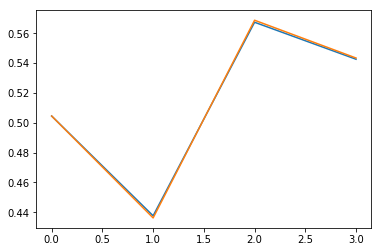

In [141]:
plt.plot(reduced_data4D[0,:])
#
plt.plot(reduced_data4D[2,:])

plt.show()

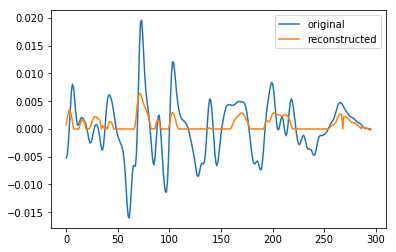

In [142]:
plt.plot(der[0,:],label='original')
plt.plot(reconstructed[0,:],label='reconstructed')
plt.legend()

# DL scatter plot

In [143]:
import pylab as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# path to DL results
path_small_space =reduced_data4D

# path to spectra ID
path_id = 'spectra_data_id.dat'

# path to kmeans result
path_kmeans = 'clustering_KMeans_label_4features_4groups.dat'

# color for plotting
c = [ 'green', 'red', 'blue', 'orange']

# markers for ploting
mark =  ['^','o',  's', 'd', '*']


In [144]:
# marker size
ss = [60, 40, 40, 60]

# read spectra ID
op2 = open(path_id, 'r')
lin2 = op2.readlines()
op2.close()

names_all = [elem.split() for elem in lin2[1:]]

lin2

['#SN, zhelio, MJD, epoch, at_max_flag\n',
 'sn2011fe 0.00080 55835.260 20.870 0\n',
 'sn2011fe 0.00080 55817.710 3.320 0\n',
 'sn2011fe 0.00080 55823.610 9.220 0\n',
 'sn2011fe 0.00080 55811.420 -2.970 1\n',
 'sn2011fe 0.00080 55855.170 40.780 0\n',
 'sn2011fe 0.00080 55807.430 -6.960 0\n',
 'sn2011fe 0.00080 55814.430 0.040 1\n',
 'sn2011fe 0.00080 55841.310 26.920 0\n',
 'sn2011fe 0.00080 55804.250 -10.140 0\n',
 'sn2011fe 0.00080 55801.120 -13.270 0\n',
 'sn2002bo 0.00430 52355.000 -1.693 1\n',
 'sn2002bo 0.00430 52343.000 -13.641 0\n',
 'sn2002bo 0.00430 52354.000 -2.688 1\n',
 'sn2002bo 0.00430 52400.000 43.115 0\n',
 'sn2002bo 0.00430 52385.000 28.179 0\n',
 'sn2002bo 0.00430 52356.000 -0.697 1\n',
 'sn2002bo 0.00430 52352.000 -4.680 0\n',
 'sn2002bo 0.00430 52343.000 -13.641 0\n',
 'sn2002bo 0.00430 52354.000 -2.688 1\n',
 'sn2002bo 0.00430 52395.000 38.136 0\n',
 'sn2002bo 0.00430 52346.000 -10.654 0\n',
 'sn2002bo 0.00430 52351.000 -5.676 0\n',
 'sn2002bo 0.00430 52344.000 -1

In [145]:
names_all[1:]

[['sn2011fe', '0.00080', '55817.710', '3.320', '0'],
 ['sn2011fe', '0.00080', '55823.610', '9.220', '0'],
 ['sn2011fe', '0.00080', '55811.420', '-2.970', '1'],
 ['sn2011fe', '0.00080', '55855.170', '40.780', '0'],
 ['sn2011fe', '0.00080', '55807.430', '-6.960', '0'],
 ['sn2011fe', '0.00080', '55814.430', '0.040', '1'],
 ['sn2011fe', '0.00080', '55841.310', '26.920', '0'],
 ['sn2011fe', '0.00080', '55804.250', '-10.140', '0'],
 ['sn2011fe', '0.00080', '55801.120', '-13.270', '0'],
 ['sn2002bo', '0.00430', '52355.000', '-1.693', '1'],
 ['sn2002bo', '0.00430', '52343.000', '-13.641', '0'],
 ['sn2002bo', '0.00430', '52354.000', '-2.688', '1'],
 ['sn2002bo', '0.00430', '52400.000', '43.115', '0'],
 ['sn2002bo', '0.00430', '52385.000', '28.179', '0'],
 ['sn2002bo', '0.00430', '52356.000', '-0.697', '1'],
 ['sn2002bo', '0.00430', '52352.000', '-4.680', '0'],
 ['sn2002bo', '0.00430', '52343.000', '-13.641', '0'],
 ['sn2002bo', '0.00430', '52354.000', '-2.688', '1'],
 ['sn2002bo', '0.00430', '5

No handles with labels found to put in legend.


[[0.50449049 0.43484229 0.57002699 0.54417807]
 [0.50449127 0.43493024 0.56994319 0.54412788]
 [0.50449008 0.43479943 0.57006788 0.54420257]
 ...
 [0.50448889 0.43466312 0.57019782 0.54428035]
 [0.50448936 0.43471304 0.57015026 0.54425186]
 [0.50448972 0.43475521 0.57011002 0.54422778]]


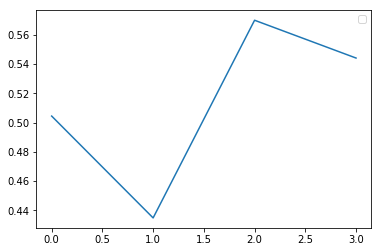

In [146]:
data1 = path_small_space#[elem for elem in ]path_small_space
# matrix at maximum brightness
matrix = np.array([[float(item) for item in data1[i]] for i in range(len(data1)) if names_all[i][-1]=='1'])
encoded_train = pd.DataFrame(matrix)
encoded_train.head()


print(matrix[0:])
plt.plot(matrix[0,:])
plt.legend()

In [147]:

# read DL results
#op1 = open(path_small_space, 'r')
#lin1 = op1.readlines()
#op1.close()


# read kmeans results
op3 = open(path_kmeans, 'r')
lin3 = op3.readlines()
op3.close()
lin3

['3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '1.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '1.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '2.000000000000000000e+00\n',
 '2.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '1.0000

In [148]:
names_all

[['sn2011fe', '0.00080', '55835.260', '20.870', '0'],
 ['sn2011fe', '0.00080', '55817.710', '3.320', '0'],
 ['sn2011fe', '0.00080', '55823.610', '9.220', '0'],
 ['sn2011fe', '0.00080', '55811.420', '-2.970', '1'],
 ['sn2011fe', '0.00080', '55855.170', '40.780', '0'],
 ['sn2011fe', '0.00080', '55807.430', '-6.960', '0'],
 ['sn2011fe', '0.00080', '55814.430', '0.040', '1'],
 ['sn2011fe', '0.00080', '55841.310', '26.920', '0'],
 ['sn2011fe', '0.00080', '55804.250', '-10.140', '0'],
 ['sn2011fe', '0.00080', '55801.120', '-13.270', '0'],
 ['sn2002bo', '0.00430', '52355.000', '-1.693', '1'],
 ['sn2002bo', '0.00430', '52343.000', '-13.641', '0'],
 ['sn2002bo', '0.00430', '52354.000', '-2.688', '1'],
 ['sn2002bo', '0.00430', '52400.000', '43.115', '0'],
 ['sn2002bo', '0.00430', '52385.000', '28.179', '0'],
 ['sn2002bo', '0.00430', '52356.000', '-0.697', '1'],
 ['sn2002bo', '0.00430', '52352.000', '-4.680', '0'],
 ['sn2002bo', '0.00430', '52343.000', '-13.641', '0'],
 ['sn2002bo', '0.00430', '5

In [149]:
classes = np.array([float(elem.split()[0]) for elem in lin3])
print(classes)
group1 = classes == 0.0
group2 = classes == 1.0
group3 = classes == 2.0
group4 = classes == 3.0

print(len(classes))

[3. 3. 0. 0. 0. 0. 1. 3. 3. 3. 1. 3. 0. 0. 0. 3. 0. 3. 2. 2. 3. 3. 3. 3.
 3. 0. 0. 3. 3. 3. 3. 3. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 2. 2. 3. 1. 3.
 1. 3. 3. 1. 3. 3. 1. 1. 3. 1. 3. 3. 3. 1. 3. 0. 0. 3. 0. 1. 3. 0. 0. 1.
 3. 3. 3. 3. 0. 3. 2. 3. 2. 2. 3. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 2.
 0. 3. 3. 3. 3. 3. 2. 3. 3. 3. 1. 3. 2. 1. 2. 0. 2. 1. 0. 3. 0. 3. 0. 3.
 1. 1. 3. 3. 1. 3. 0. 2. 3. 1. 1. 0. 1. 1. 3. 1. 1. 1. 0. 3. 3. 3. 0. 0.
 3. 3. 3. 1. 3. 0. 3. 0. 3. 3. 1. 3. 3. 0. 0. 0. 0. 0. 3. 0. 3. 0. 1. 3.
 0. 3. 3. 0. 1. 0. 0. 0. 3. 3. 0. 0. 1. 1. 3. 1. 1. 2. 1. 1. 2. 1. 2. 2.
 1. 0. 3. 3. 3. 0. 3. 0. 0. 1. 3. 3. 1. 0. 1. 0. 2. 3. 1. 1. 1. 0. 3. 0.
 3. 3. 3. 1. 3. 0. 0. 0. 0. 3. 1. 0. 1. 0. 1. 3. 1. 0. 3. 0. 0. 1. 3. 3.
 1. 0. 0. 3. 3. 3. 1. 3. 3. 0. 0. 3. 3. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 3.
 3. 0. 1. 1. 3. 0. 2. 0. 1. 0. 3. 3. 1. 1. 1. 3. 3. 3. 1. 0. 3. 3. 1. 0.
 0. 3. 3. 1. 2. 2. 3. 1. 3. 0. 0. 1. 2. 3. 3. 2. 0. 2. 3. 3. 2. 1. 0. 1.
 1. 1. 3. 1. 0. 0. 3. 1. 3. 0. 3. 1. 0. 1. 2. 3. 0.

In [73]:
matrix[group1,0].max()

0.4687543213367462

In [74]:
matrix[group1,3].max()

0.6518504023551941

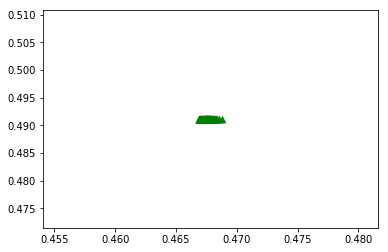

In [102]:
#plt.subplot(4,4,5)
plt.scatter(matrix[group1,0], matrix[group1,2], lw='0',marker=mark[0],s=ss[0], color=c[0])
#plt.scatter(matrix[group2,0], matrix[group2,2], lw='0',marker=mark[1],s=ss[1], color=c[1])
#plt.scatter(matrix[group3,0], matrix[group3,2], lw='0',marker=mark[2],s=ss[2], color=c[2])
#plt.scatter(matrix[group4,0], matrix[group4,2], lw='0',marker=mark[3],s=ss[3], color=c[3])
#plt.ylabel('feature 2', fontsize=26)
#plt.xticks()#plt.xticks([])
#plt.yticks(fontsize=22)
plt.show()

In [ ]:

plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(0.00072700,0.00073300)
plt.ylim(0.003635,0.003656)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

In [375]:
matrix[group1,2].min()

0.003246370702981949

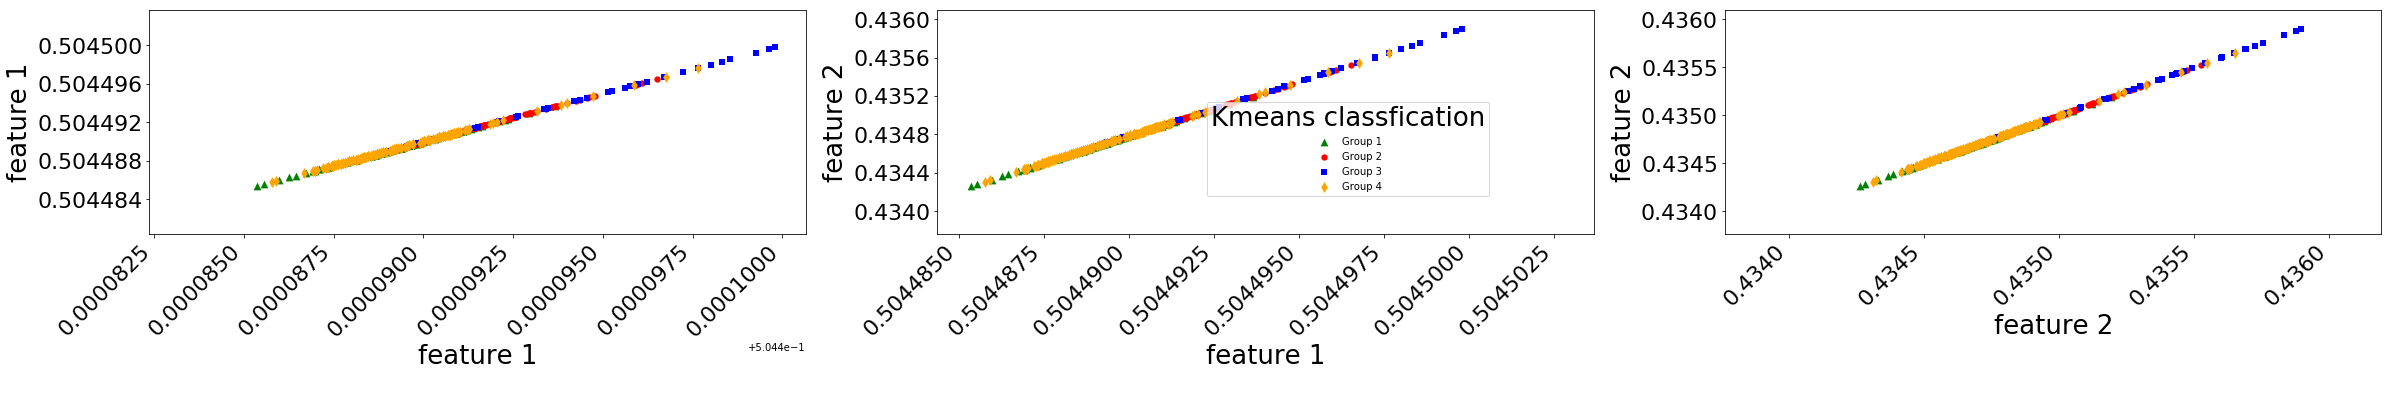

In [361]:
# plot only DL results
fig = plt.figure(figsize=(40,14))
plt.subplot(3,3,1)
panels = []
panels.append(plt.scatter(matrix[group1,0], matrix[group1,0], lw='0',marker=mark[0],s=ss[0], color=c[0]))
panels.append(plt.scatter(matrix[group2,0], matrix[group2,0], lw='0',marker=mark[1],s=ss[1], color=c[1]))
panels.append(plt.scatter(matrix[group3,0], matrix[group3,0], lw='0',marker=mark[2],s=ss[2], color=c[2]))
panels.append(plt.scatter(matrix[group4,0], matrix[group4,0], lw='0',marker=mark[3],s=ss[3], color=c[3]))
plt.ylabel('feature 1', fontsize=26)
plt.xlabel('feature 1',fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(matrix[group1,0].min()-0.000003,matrix[group1,0].max()+0.0000070)
plt.ylim(matrix[group1,0].min()-0.000005,matrix[group1,0].max()+0.00001)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")



plt.subplot(3,3,2)
plt.scatter(matrix[group1,0], matrix[group1,1], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,0], matrix[group2,1], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,0], matrix[group3,1], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,0], matrix[group4,1], lw='0',marker=mark[3],s=ss[3], color=c[3])
plt.ylabel('feature 2', fontsize=26)
plt.xlabel('feature 1', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(matrix[group1,0].min()-0.000001,matrix[group1,0].max()+0.00001)
plt.ylim(matrix[group1,1].min()-0.0005,matrix[group1,1].max()+0.0009)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")




plt.subplot(3,3,3)
plt.scatter(matrix[group1,1], matrix[group1,1], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,1], matrix[group2,1], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,1], matrix[group3,1], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,1], matrix[group4,1], lw='0',marker=mark[3],s=ss[3], color=c[3])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylabel('feature 2', fontsize=26)
plt.xlabel('feature 2', fontsize=26)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.xlim(matrix[group1,1].min()-0.0005,matrix[group1,1].max()+0.001)
plt.ylim(matrix[group1,1].min()-0.0005,matrix[group1,1].max()+0.0009)
#plt.subplots_adjust(left=0.075, right=0.975, top=0.975, bottom=0.075,hspace=0.0,wspace=0.0)
legs=fig.legend(panels, ['Group 1', 'Group 2', 'Group 3', 'Group 4'], loc = (0.5044, 0.5045025), title='Kmeans classfication', fontsize=10)
plt.setp(legs.get_title(),fontsize=26)
plt.savefig("DL_KMeans_scatter_4g1.pdf", format='pdf',dpi=1000)

plt.show()


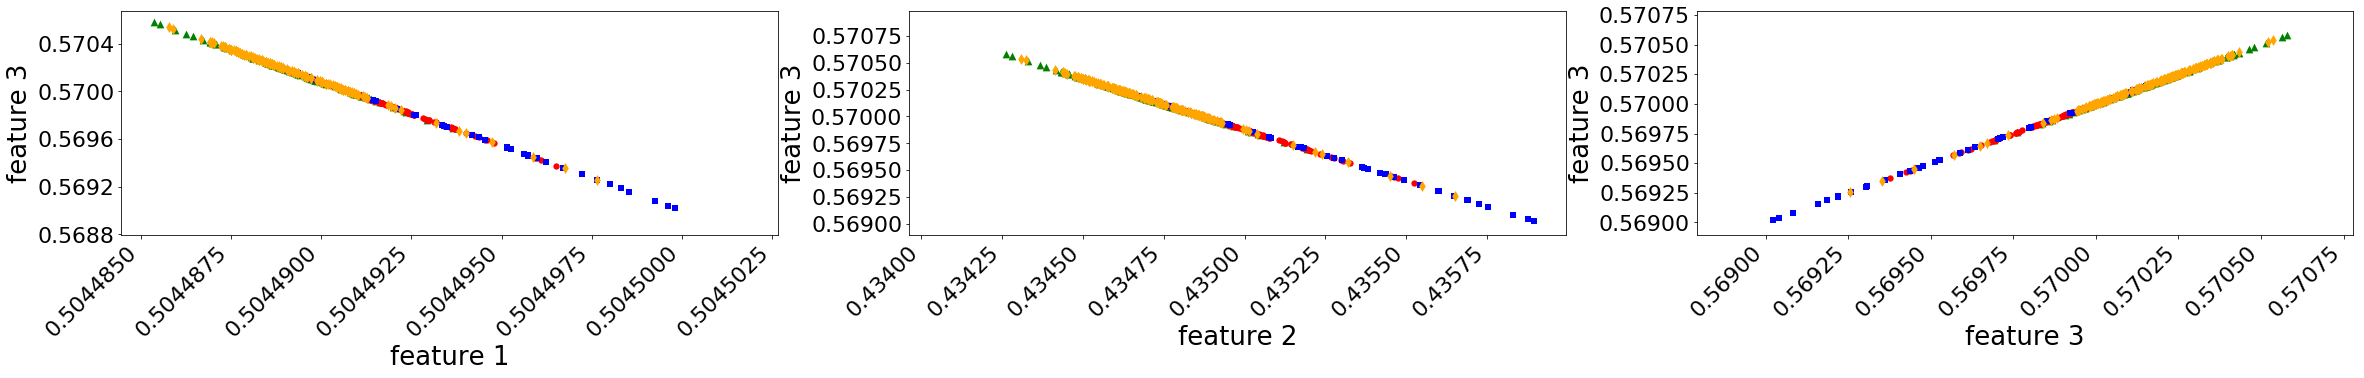

In [362]:
fig = plt.figure(figsize=(40,14))
plt.subplot(3,3,1)
plt.scatter(matrix[group1,0], matrix[group1,2], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,0], matrix[group2,2], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,0], matrix[group3,2], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,0], matrix[group4,2], lw='0',marker=mark[3],s=ss[3], color=c[3])
plt.ylabel('feature 3', fontsize=26)
plt.xlabel('feature 1', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.xlim(matrix[group1,0].min()-0.0000009,matrix[group1,0].max()+0.000009)
plt.ylim(matrix[group1,2].min()-0.0009,matrix[group1,2].max()+0.00009)



plt.subplot(3,3,2)
plt.scatter(matrix[group1,1], matrix[group1,2], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,1], matrix[group2,2], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,1], matrix[group3,2], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,1], matrix[group4,2], lw='0',marker=mark[3],s=ss[3], color=c[3])
plt.ylabel('feature 3', fontsize=26)
plt.xlabel('feature 2', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.xlim(matrix[group1,1].min()-0.0003,matrix[group1,1].max()+0.0008)
plt.ylim(matrix[group1,2].min()-0.0008,matrix[group1,2].max()+0.0004)



plt.subplot(3,3,3)
plt.scatter(matrix[group1,2], matrix[group1,2], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,2], matrix[group2,2], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,2], matrix[group3,2], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,2], matrix[group4,2], lw='0',marker=mark[3],s=ss[3], color=c[3])
plt.ylabel('feature 3', fontsize=26)
plt.xlabel('feature 3', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(matrix[group1,2].min()-0.0009,matrix[group1,2].max()+0.0002)
plt.ylim(matrix[group1,2].min()-0.0008,matrix[group1,2].max()+0.0002)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

#legs=fig.legend(panels, ['Group 1', 'Group 2', 'Group 3', 'Group 4'], loc = (0.434, 0.4342), title='Kmeans classfication', fontsize=10)
#plt.setp(legs.get_title(),fontsize=26)
plt.savefig("DL_KMeans_scatter_4g2.pdf", format='pdf',dpi=1000)

plt.show()


In [363]:
matrix[group1,2]

array([0.57006788, 0.57009566, 0.57010025, 0.57013077, 0.57020634,
       0.57009339, 0.56998003, 0.5701502 , 0.56990808, 0.56998861,
       0.57022828, 0.57014704, 0.57016158, 0.57007545, 0.57009113,
       0.57008207, 0.56997895, 0.57028097, 0.57024497, 0.57016736,
       0.5702188 , 0.57024604, 0.57020843, 0.57022774, 0.57023412,
       0.57016629, 0.57015079, 0.57009554, 0.57041699, 0.57015717,
       0.56991827, 0.57016605, 0.57015836, 0.57026541, 0.57021552,
       0.57046229, 0.57024223, 0.5700953 , 0.57014674, 0.57006878,
       0.56993121, 0.57018715, 0.57022309, 0.57051653, 0.57043225,
       0.56997943, 0.57028127, 0.56998336, 0.57011807, 0.57014769,
       0.5702911 , 0.57017988, 0.57039356, 0.57021457, 0.57030934,
       0.57037693, 0.56998134, 0.56996584, 0.57035995, 0.56983697,
       0.57008445, 0.5697602 , 0.57017583, 0.57020968, 0.57023662,
       0.57020766, 0.57012236, 0.56998223, 0.57023293, 0.57004166,
       0.57005161, 0.57017326, 0.57015139, 0.57018512, 0.57014

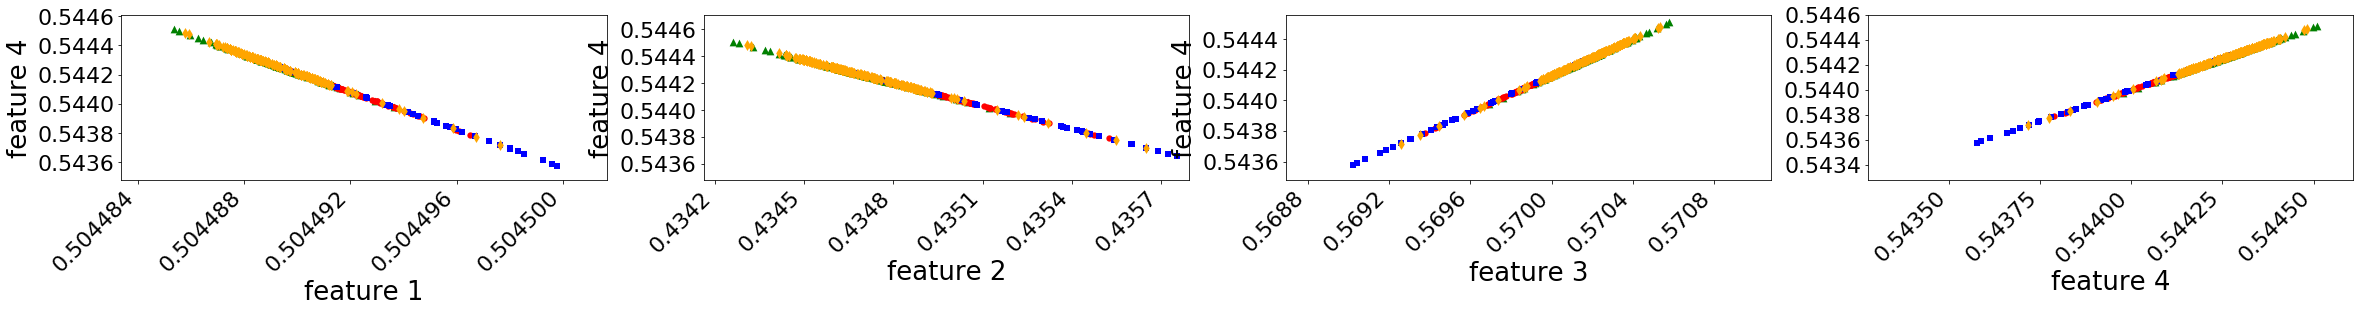

In [364]:
fig = plt.figure(figsize=(40,14))



plt.subplot(4,4,1)
plt.scatter(matrix[group1,0], matrix[group1,3], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,0], matrix[group2,3], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,0], matrix[group3,3], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,0], matrix[group4,3], lw='0',marker=mark[3],s=ss[3], color=c[3])
plt.ylabel('feature 4', fontsize=26)
plt.xlabel('feature 1', fontsize=26)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(matrix[group1,0].min()-0.000002,matrix[group1,0].max()+0.000008)
plt.ylim(matrix[group1,3].min()-0.0005,matrix[group1,3].max()+0.0001)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


plt.subplot(4,4,2)
plt.scatter(matrix[group1,1], matrix[group1,3], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,1], matrix[group2,3], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,1], matrix[group3,3], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,1], matrix[group4,3], lw='0',marker=mark[3],s=ss[3], color=c[3])
plt.xlabel('feature 2', fontsize=26)
plt.ylabel('feature 4', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xticks(fontsize=22)
plt.xlim(matrix[group1,1].min()-0.0001,matrix[group1,1].max()+0.0006)
plt.ylim(matrix[group1,3].min()-0.0005,matrix[group1,3].max()+0.0002)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


plt.subplot(4,4,3)
plt.scatter(matrix[group1,2], matrix[group1,3], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,2], matrix[group2,3], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,2], matrix[group3,3], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,2], matrix[group4,3], lw='0',marker=mark[3],s=ss[3], color=c[3])
plt.xlabel('feature 3',fontsize=26)
plt.ylabel('feature 4',fontsize=26)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(matrix[group1,2].min()-0.001,matrix[group1,2].max()+0.0005)
plt.ylim(matrix[group1,3].min()-0.0005,matrix[group1,3].max()+0.00005)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.subplot(4,4,4)
plt.scatter(matrix[group1,3], matrix[group1,3], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,3], matrix[group2,3], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,3], matrix[group3,3], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,3], matrix[group4,3], lw='0',marker=mark[3],s=ss[3], color=c[3])
plt.xlabel('feature 4', fontsize=26)
plt.xlabel('feature 4', fontsize=26)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(matrix[group1,3].min()-0.0007,matrix[group1,3].max()+0.0001)
plt.ylim(matrix[group1,3].min()-0.0007,matrix[group1,3].max()+0.00009)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.savefig("DL_KMeans_scatter_4g3.pdf", format='pdf',dpi=1000)

plt.show()

# Wang DL

In [ ]:
import pylab as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

def load_colors(sne_list,type='Wang'):

    import urllib
    import numpy
    
    op1=open('wang_data.txt','r')
    lin1 = op1.readlines()
    op1.close()
    data1 = [elem[:16].split()[0] for elem in lin1[51:]]
    data2 = [elem[41:].split() for elem in lin1[51:]]
    
    for i in range(numpy.shape(data2)[0]):
        if numpy.size(data2[i])==1:
            data2[i]= [ data2[i][0],'nan']
    
    if type=='Wang':
        name_dict={'name':['HV','N','91bg','91T','nan'],
                   'color':['y','g','c','r','b'],
                   'mark':[u"s",u"o",u"2",u"D",u"*"]}

        index=1
    if type=='Branch':
        name_dict={'name':['BL','CN','CL','SS'],
                   'color':['y','g','r','b'],
                   'mark':[u"s",u"o",u"2",u"D"]}
        index=0

    col_=[name_dict['name'],name_dict['color']]
    mark_=[name_dict['name'],name_dict['mark']]
    color_list=[]
    shape_list=[]
    for i in sne_list:
        if i[2:] in data1:
            color_list.append( col_[1][col_[0].index(data2[data1.index(i[2:])][index])])
            shape_list.append(mark_[1][mark_[0].index(data2[data1.index(i[2:])][index])])
        else:
            color_list.append('k')
            shape_list.append(u'x')
    return color_list,shape_list,name_dict
###############################################################################################

# path to DL results

In [ ]:
path_small_space = reduced_data4D

# path to spectra ID
path_id = 'spectra_data_id.dat'

# read spectra ID
op2 = open(path_id, 'r')
lin2 = op2.readlines()
op2.close()

names_all = [elem.split() for elem in lin2[1:]]
names_max = [names_all[i][0] for i in range(len(names_all)) if names_all[i][-1] == '1']


# build wang color code 
color_wang = load_colors(names_max)

# separate groups accorging to wang classification
wang_code = []
for cor in color_wang[2]['color'][:-1]:
    temp_code = np.array(color_wang[0]) == cor
    wang_code.append(temp_code)

# read DL results
#op1 = open(path_small_space, 'r')
#lin1 = op1.readlines()
#op1.close()

data1 = reduced_data4D

matrix = np.array([[float(item) for item in data1[i]] for i in range(len(data1)) if names_all[i][-1]=='1'])

my_colors = ['green', 'red', 'blue', 'orange']
my_marks = ['^','o',  's', 'd', '*']

# marker size
ss = [60, 40, 40, 60]


In [ ]:
# plot only DL results
fig = plt.figure(figsize=(20,14))
plt.subplot(4,4,1)
legs = [[] for k in range(len(wang_code))]
names = []
for j in [1,0,2,3]:
    legs[j] = plt.scatter(matrix[wang_code[j],0], matrix[wang_code[j],0], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
    names.append(color_wang[2]['name'][j])
plt.ylabel('feature 1', fontsize=26)
plt.xticks([])
plt.yticks(fontsize=22)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(matrix[group1,0].min()-0.000003,matrix[group1,0].max()+0.0000070)
plt.ylim(matrix[group1,0].min()-0.000005,matrix[group1,0].max()+0.00001)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.subplot(4,4,5)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],0], matrix[wang_code[j],1], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.ylabel('feature 2', fontsize=26)
plt.xticks([])
plt.yticks(fontsize=22)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(matrix[group1,0].min()-0.000001,matrix[group1,0].max()+0.00001)
plt.ylim(matrix[group1,1].min()-0.0005,matrix[group1,1].max()+0.0009)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.subplot(4,4,6)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],1], matrix[wang_code[j],1], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.xticks([])
plt.yticks([])

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


legs=fig.legend(panels, ['Group 1', 'Group 2', 'Group 3', 'Group 4'], loc = (0.5044, 0.5045025), title='Kmeans classfication', fontsize=10)
plt.setp(legs.get_title(),fontsize=26)
plt.savefig("DL_KMeans_scatter_4g1.pdf", format='pdf',dpi=1000)

In [ ]:
plt.subplot(4,4,9)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],0], matrix[wang_code[j],2], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.ylabel('feature 3', fontsize=26)
plt.xticks([])
plt.yticks(fontsize=22)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))

plt.subplot(4,4,10)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],1], matrix[wang_code[j],2], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.xticks([])
plt.yticks([])

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


plt.subplot(4,4,11)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],2], matrix[wang_code[j],2], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.xticks([])
plt.yticks([])

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


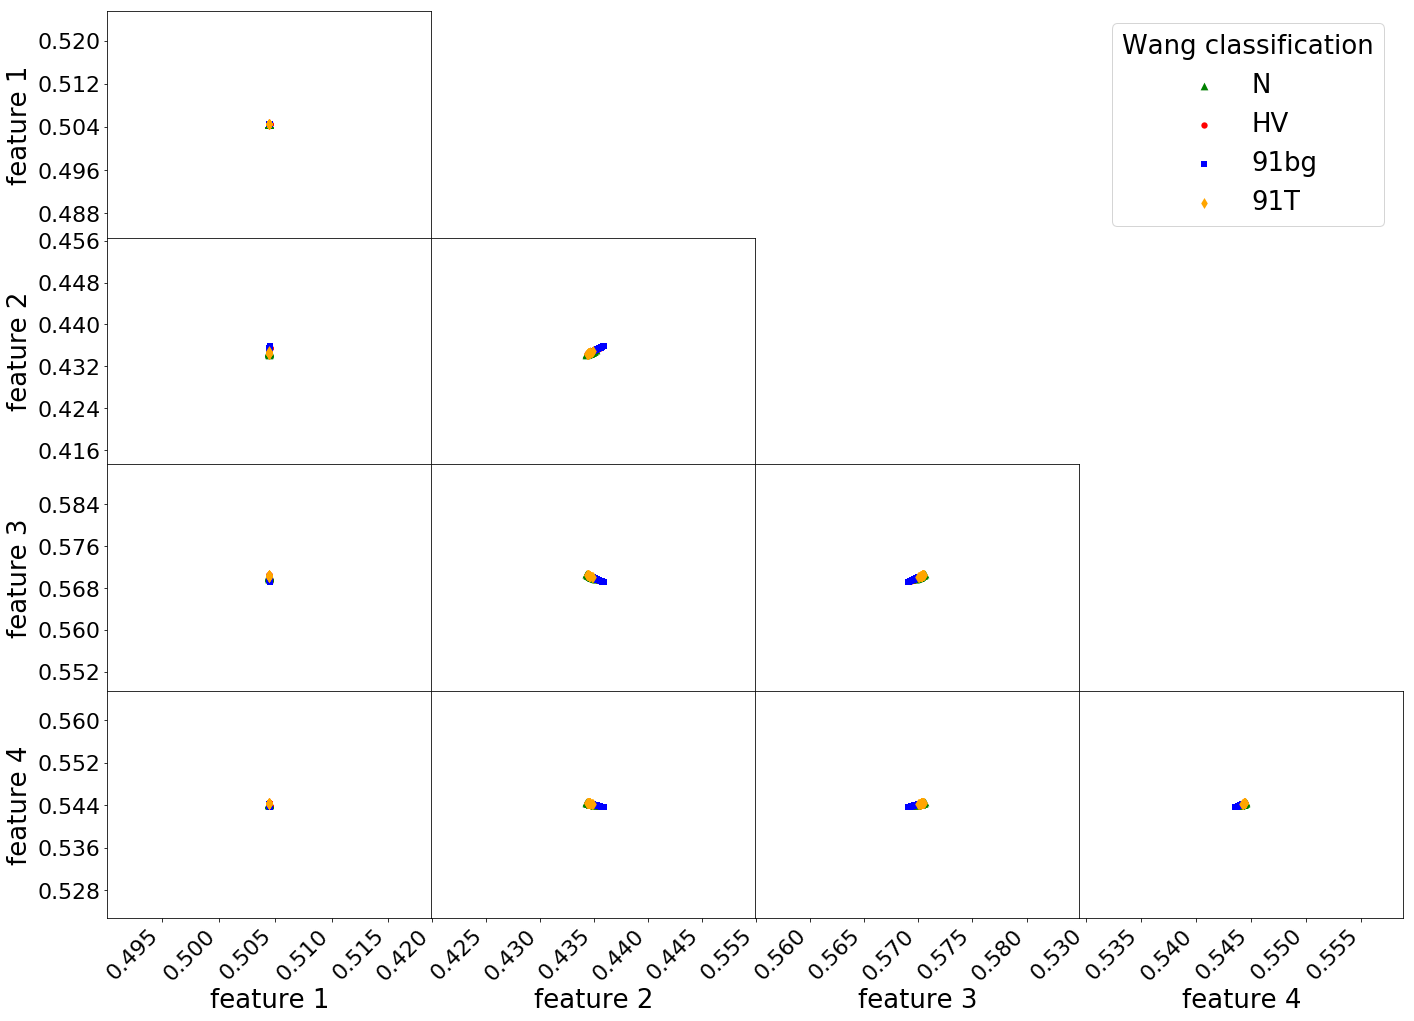

In [365]:





plt.subplot(4,4,13)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],0], matrix[wang_code[j],3], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.ylabel('feature 4', fontsize=26)
plt.xlabel('feature 1', fontsize=26)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


plt.subplot(4,4,14)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],1], matrix[wang_code[j],3], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.xlabel('feature 2', fontsize=26)
plt.yticks([])
plt.xticks(fontsize=22)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))


plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


plt.subplot(4,4,15)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],2], matrix[wang_code[j],3], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.xlabel('feature 3',fontsize=26)
plt.yticks([])
plt.xticks(fontsize=22)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


plt.subplot(4,4,16)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],3], matrix[wang_code[j],3], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.xlabel('feature 4', fontsize=26)
plt.yticks([])
plt.xticks(fontsize=22)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

#plt.subplots_adjust(left=0.075, right=0.975, top=0.975, bottom=0.075,hspace=0.0,wspace=0.0)
legend = fig.legend(legs, names, loc = (0.786, 0.778), title='Wang classification', fontsize=26)
plt.setp(legend.get_title(),fontsize=26)
plt.savefig("wang_DL_scatter.pdf", format='pdf',dpi=1000)



# Reducing the data to 15 dimensions


In [125]:
#introducing the dimension we want to reduce to


encoding_dim = 15

In [126]:

input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(128, activation = activation2)(input_dim)
encoded2 = Dense(100, activation = activation2)(encoded1)
encoded3 = Dense(72, activation = activation2)(encoded2)
encoded4 = Dense(60, activation = activation2)(encoded3)
encoded5 = Dense(40, activation = activation2)(encoded4)
encoded6 = Dense(32, activation = activation2)(encoded5)
encoded7 = Dense(20, activation = activation2)(encoded6)
encoded8 = Dense(19, activation = activation2)(encoded7)
encoded9 = Dense(16, activation = activation2)(encoded8)
encoded_middle = Dense(encoding_dim, activation = activation)(encoded9)

# Decoder Layers
decoded0 = Dense(16, activation = activation2)(encoded_middle)
decoded1 = Dense(19, activation = activation2)(decoded0)
decoded2 = Dense(20, activation = activation2)(decoded1)
decoded3 = Dense(32, activation = activation2)(decoded2)
decoded4 = Dense(40, activation = activation2)(decoded3)
decoded5 = Dense(60, activation = activation2)(decoded4)
decoded6 = Dense(72, activation = activation2)(decoded5)
decoded7 = Dense(100, activation = activation2)(decoded6)
decoded8 = Dense(128, activation = activation2)(decoded7)
decoded_out = Dense(ncol, activation = activation)(decoded8)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded_out)
#
middle  = Model(inputs =input_dim, outputs = encoded_middle)


# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

#
middle.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [127]:
autoencoder.summary()
middle.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 296)               0         
_________________________________________________________________
dense_121 (Dense)            (None, 128)               38016     
_________________________________________________________________
dense_122 (Dense)            (None, 100)               12900     
_________________________________________________________________
dense_123 (Dense)            (None, 72)                7272      
_________________________________________________________________
dense_124 (Dense)            (None, 60)                4380      
_________________________________________________________________
dense_125 (Dense)            (None, 40)                2440      
_________________________________________________________________
dense_126 (Dense)            (None, 32)                1312      
__________

In [128]:
#  train and validation
autoencoder.fit(der, der ,nb_epoch = 10), 
                #batch_size = 1, 
                #shuffle = False, 
                #validation_data = (X_test,X_test))


/usr/lib/python3/dist-packages/ipykernel/__main__.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/10
3677/3677 [==============================] - 3s 783us/step - loss: 0.2769
Epoch 2/10
3677/3677 [==============================] - 1s 285us/step - loss: -0.0029
Epoch 3/10
3677/3677 [==============================] - 1s 312us/step - loss: -0.0041
Epoch 4/10
3677/3677 [==============================] - 1s 312us/step - loss: -0.0042
Epoch 5/10
3677/3677 [==============================] - 1s 296us/step - loss: -0.0042
Epoch 6/10
3677/3677 [==============================] - 1s 287us/step - loss: -0.0042
Epoch 7/10
3677/3677 [==============================] - 1s 285us/step - loss: -0.0042
Epoch 8/10
3677/3677 [==============================] - 1s 308us/step - loss: -0.0042
Epoch 9/10
3677/3677 [==============================] - 1s 292us/step - loss: -0.0042
Epoch 10/10
3677/3677 [==============================] - 1s 291us/step - loss: -0.0042


(<keras.callbacks.History at 0x7f75b00869e8>,)

In [129]:
#reduced data and its shape 

reduced_data15D=middle.predict(der)
print(reduced_data15D.shape,reduced_data4D)

(3677, 15) [[0.5383378  0.4590117  0.51690584 0.53791636]
 [0.53983927 0.45752025 0.51728415 0.5389338 ]
 [0.5391105  0.45824635 0.51710844 0.5384301 ]
 ...
 [0.5389857  0.45839137 0.5171566  0.53835535]
 [0.5383679  0.45898283 0.5169176  0.53794   ]
 [0.5387972  0.45859206 0.51715994 0.5382334 ]]


In [130]:
middle.predict(der).shape

(3677, 15)

In [131]:
reconstructed15= autoencoder.predict(der)
reconstructed15

array([[7.9650030e-04, 2.2590442e-03, 3.4167543e-03, ..., 5.1571740e-05,
        5.3112897e-05, 8.0747576e-08],
       [7.9614826e-04, 2.2581920e-03, 3.4155548e-03, ..., 5.1539831e-05,
        5.3080443e-05, 8.0665217e-08],
       [7.9618843e-04, 2.2582910e-03, 3.4156945e-03, ..., 5.1543662e-05,
        5.3084088e-05, 8.0674461e-08],
       ...,
       [7.9638878e-04, 2.2587616e-03, 3.4163697e-03, ..., 5.1561659e-05,
        5.3102569e-05, 8.0720945e-08],
       [7.9648133e-04, 2.2589969e-03, 3.4166845e-03, ..., 5.1569772e-05,
        5.3111024e-05, 8.0742645e-08],
       [7.9638348e-04, 2.2587595e-03, 3.4163536e-03, ..., 5.1561117e-05,
        5.3102318e-05, 8.0719857e-08]], dtype=float32)

# Plotting the original and the reconstructed data

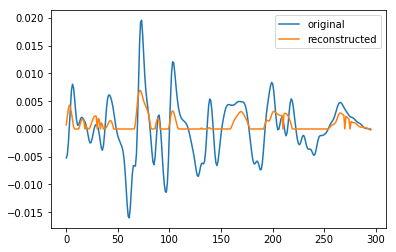

In [132]:
plt.plot(der[0,:],label='original')
plt.plot(reconstructed[0,:],label='reconstructed')
plt.legend()

# Creating a model to obtain data at Maximum brightness

# Plotting DL and PCA recontructed data

In [143]:
# read data
der = loadtxt('derivatives_all_epochs.dat')
flux = 0.8*loadtxt('fluxes_not_res.dat.gz')
labels = loadtxt('mask.dat')
spectra_data = genfromtxt('spectra_data_id.dat',dtype=None)
print(flux)

[[0.4347324  0.44010166 0.44770785 ... 0.18097831 0.18194282 0.18211001]
 [0.76235907 0.77142916 0.78476464 ... 0.11574286 0.11417586 0.11402968]
 [0.77334289 0.78044525 0.79022809 ... 0.12502131 0.12457291 0.12443703]
 ...
 [0.16426865 0.20130244 0.19986136 ... 0.32459495 0.33340263 0.33870649]
 [0.50178871 0.52377362 0.5489847  ... 0.15732871 0.15396522 0.14639834]
 [0.26502682 0.27001135 0.36911683 ... 0.26947203 0.27288834 0.27555464]]


/usr/lib/python3/dist-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


In [144]:
# make pca reduction(to   4 dimensions )
pca = PCA(n_components=4)
pca.fit(der)
X = pca.transform(der)
pred_PCA = (pca.inverse_transform(X))

In [145]:
#dataframe of my reconstructed  data using PCA

encoded_train = pd.DataFrame(pred_PCA)
encoded_train = encoded_train.add_prefix('feature_')

In [146]:
#saving the reconstructed data

encoded_train.to_csv('recontructed4D.csv', index=False)

In [147]:
encoded_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295
0,-0.006063,-0.004159,-0.001048,0.002521,0.005670,0.007757,0.008487,0.007882,0.006273,0.004274,...,0.000562,0.000444,0.000336,0.000218,0.000081,-0.000070,-0.000210,-0.000317,-0.000375,-0.000381
1,0.001619,0.005096,0.008178,0.009705,0.009086,0.006553,0.002884,-0.001024,-0.004389,-0.006595,...,0.000360,0.000352,0.000364,0.000374,0.000367,0.000348,0.000336,0.000343,0.000363,0.000374
2,0.000476,0.004459,0.008397,0.010998,0.011433,0.009697,0.006436,0.002553,-0.001068,-0.003691,...,0.000331,0.000252,0.000209,0.000181,0.000154,0.000133,0.000132,0.000160,0.000208,0.000253
3,0.002339,0.004729,0.006482,0.006860,0.005642,0.003214,0.000273,-0.002529,-0.004723,-0.005982,...,0.000327,0.000356,0.000390,0.000409,0.000404,0.000379,0.000352,0.000337,0.000334,0.000332
4,-0.007724,-0.007309,-0.005706,-0.003138,-0.000081,0.002915,0.005305,0.006638,0.006720,0.005779,...,0.000189,0.000157,0.000121,0.000060,-0.000041,-0.000185,-0.000355,-0.000522,-0.000659,-0.000746


In [148]:
# make pca reduction(to   15 dimensions )

pca = PCA(n_components=15)
pca.fit(der)
X = pca.transform(der)
pred_PCA_15PC = (pca.inverse_transform(X))

In [149]:
#data frame of my reconstructed  data using PCA

encoded_train = pd.DataFrame(pred_PCA_15PC)
encoded_train = encoded_train.add_prefix('feature_')


In [150]:
encoded_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295
0,-0.005842,-0.005141,-0.002962,0.000243,0.003546,0.006005,0.007020,0.006473,0.004715,0.002485,...,0.000904,0.000624,0.000351,0.000107,-0.000104,-0.000298,-0.000486,-0.000660,-0.000785,-0.000826
1,-0.001193,0.002369,0.006610,0.009926,0.011010,0.009533,0.006098,0.001765,-0.002384,-0.005463,...,0.000368,0.000362,0.000353,0.000344,0.000347,0.000377,0.000436,0.000508,0.000559,0.000554
2,-0.002547,0.001918,0.007398,0.012058,0.014289,0.013496,0.010187,0.005542,0.000914,-0.002546,...,0.000431,0.000318,0.000202,0.000099,0.000035,0.000036,0.000103,0.000202,0.000279,0.000295
3,0.000739,0.004311,0.007514,0.009141,0.008574,0.006045,0.002391,-0.001401,-0.004517,-0.006429,...,0.000236,0.000321,0.000383,0.000427,0.000470,0.000526,0.000588,0.000628,0.000616,0.000537
4,-0.005978,-0.005899,-0.004857,-0.002694,0.000297,0.003456,0.006009,0.007350,0.007252,0.005947,...,0.000375,0.000353,0.000318,0.000248,0.000130,-0.000043,-0.000261,-0.000501,-0.000731,-0.000917


In [151]:
#saving the reconstructed data
encoded_train.to_csv('reconstructed15D.csv', index=False)

In [152]:
encoded_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295
0,-0.005842,-0.005141,-0.002962,0.000243,0.003546,0.006005,0.007020,0.006473,0.004715,0.002485,...,0.000904,0.000624,0.000351,0.000107,-0.000104,-0.000298,-0.000486,-0.000660,-0.000785,-0.000826
1,-0.001193,0.002369,0.006610,0.009926,0.011010,0.009533,0.006098,0.001765,-0.002384,-0.005463,...,0.000368,0.000362,0.000353,0.000344,0.000347,0.000377,0.000436,0.000508,0.000559,0.000554
2,-0.002547,0.001918,0.007398,0.012058,0.014289,0.013496,0.010187,0.005542,0.000914,-0.002546,...,0.000431,0.000318,0.000202,0.000099,0.000035,0.000036,0.000103,0.000202,0.000279,0.000295
3,0.000739,0.004311,0.007514,0.009141,0.008574,0.006045,0.002391,-0.001401,-0.004517,-0.006429,...,0.000236,0.000321,0.000383,0.000427,0.000470,0.000526,0.000588,0.000628,0.000616,0.000537
4,-0.005978,-0.005899,-0.004857,-0.002694,0.000297,0.003456,0.006009,0.007350,0.007252,0.005947,...,0.000375,0.000353,0.000318,0.000248,0.000130,-0.000043,-0.000261,-0.000501,-0.000731,-0.000917


In [153]:
# load deep learning results (4D data)

pred_DL=reconstructed
pred_DL.shape

(3677, 296)

In [154]:
pred_DL.shape

(3677, 296)

In [155]:
# define wavelength range
wavelenght_array = array(range(3200,9000,2))
len(wavelenght_array)

2900

In [156]:

print(wavelenght_array[370])

print(wavelenght_array[1849])

3940
6898


In [157]:
#picking up every value in the wavelength array from index 360 to 1850 
wavelenght_array = wavelenght_array[range(370,1850,1)]
print(len(wavelenght_array))
print(wavelenght_array)

1480
[3940 3942 3944 ... 6894 6896 6898]


In [158]:
from numpy import loadtxt, genfromtxt, shape, mean, sort, savetxt, size, array, copy
from pylab import figure
from matplotlib.pyplot import plot, savefig, xlabel, ylabel, scatter, axis, xlim, fill_between, legend, text, show
from sklearn.decomposition.pca import PCA
import pylab as plt
import numpy as np


In [159]:
#coping the selected array of wavelength

wavelenght_array_flux = copy(wavelenght_array)
wavelenght_array_flux

array([3940, 3942, 3944, ..., 6894, 6896, 6898])

In [160]:
# the different between the index is 5 so after five indexes we pik a number

wavelenght_array = wavelenght_array[::5]
print(len(wavelenght_array))
# since we have 256 columns on our reconstructed data we should also have 296 vavelenth values
wavelenght_array

296


array([3940, 3950, 3960, 3970, 3980, 3990, 4000, 4010, 4020, 4030, 4040,
       4050, 4060, 4070, 4080, 4090, 4100, 4110, 4120, 4130, 4140, 4150,
       4160, 4170, 4180, 4190, 4200, 4210, 4220, 4230, 4240, 4250, 4260,
       4270, 4280, 4290, 4300, 4310, 4320, 4330, 4340, 4350, 4360, 4370,
       4380, 4390, 4400, 4410, 4420, 4430, 4440, 4450, 4460, 4470, 4480,
       4490, 4500, 4510, 4520, 4530, 4540, 4550, 4560, 4570, 4580, 4590,
       4600, 4610, 4620, 4630, 4640, 4650, 4660, 4670, 4680, 4690, 4700,
       4710, 4720, 4730, 4740, 4750, 4760, 4770, 4780, 4790, 4800, 4810,
       4820, 4830, 4840, 4850, 4860, 4870, 4880, 4890, 4900, 4910, 4920,
       4930, 4940, 4950, 4960, 4970, 4980, 4990, 5000, 5010, 5020, 5030,
       5040, 5050, 5060, 5070, 5080, 5090, 5100, 5110, 5120, 5130, 5140,
       5150, 5160, 5170, 5180, 5190, 5200, 5210, 5220, 5230, 5240, 5250,
       5260, 5270, 5280, 5290, 5300, 5310, 5320, 5330, 5340, 5350, 5360,
       5370, 5380, 5390, 5400, 5410, 5420, 5430, 54

In [161]:
#reduce by 5

wavelenght_array_int = wavelenght_array[:]-5.
wavelenght_array_int

array([3935., 3945., 3955., 3965., 3975., 3985., 3995., 4005., 4015.,
       4025., 4035., 4045., 4055., 4065., 4075., 4085., 4095., 4105.,
       4115., 4125., 4135., 4145., 4155., 4165., 4175., 4185., 4195.,
       4205., 4215., 4225., 4235., 4245., 4255., 4265., 4275., 4285.,
       4295., 4305., 4315., 4325., 4335., 4345., 4355., 4365., 4375.,
       4385., 4395., 4405., 4415., 4425., 4435., 4445., 4455., 4465.,
       4475., 4485., 4495., 4505., 4515., 4525., 4535., 4545., 4555.,
       4565., 4575., 4585., 4595., 4605., 4615., 4625., 4635., 4645.,
       4655., 4665., 4675., 4685., 4695., 4705., 4715., 4725., 4735.,
       4745., 4755., 4765., 4775., 4785., 4795., 4805., 4815., 4825.,
       4835., 4845., 4855., 4865., 4875., 4885., 4895., 4905., 4915.,
       4925., 4935., 4945., 4955., 4965., 4975., 4985., 4995., 5005.,
       5015., 5025., 5035., 5045., 5055., 5065., 5075., 5085., 5095.,
       5105., 5115., 5125., 5135., 5145., 5155., 5165., 5175., 5185.,
       5195., 5205.,

In [162]:
# plot
n_plot1 = 0

range_to_plot =[
 2240,
2920,
47,
175,
 3174,
17,
 108,
 1401,
 26,
 1794,
 ]

n_plot = size(range_to_plot)
 #creating two enmpty list
axs = [[] for i in range(2)]
print(axs)



[[], []]


In [163]:
pred_DL[range_to_plot[0]][:1]

array([0.00072892], dtype=float32)

In [164]:
sum(pred_DL[range_to_plot[0]][:1])

0.0007289184723049402

In [165]:
names = ['measured', 'reconst. 4PCs', 'reconst. 15PCs', 'reconst. Autoencoder \n 4 features']







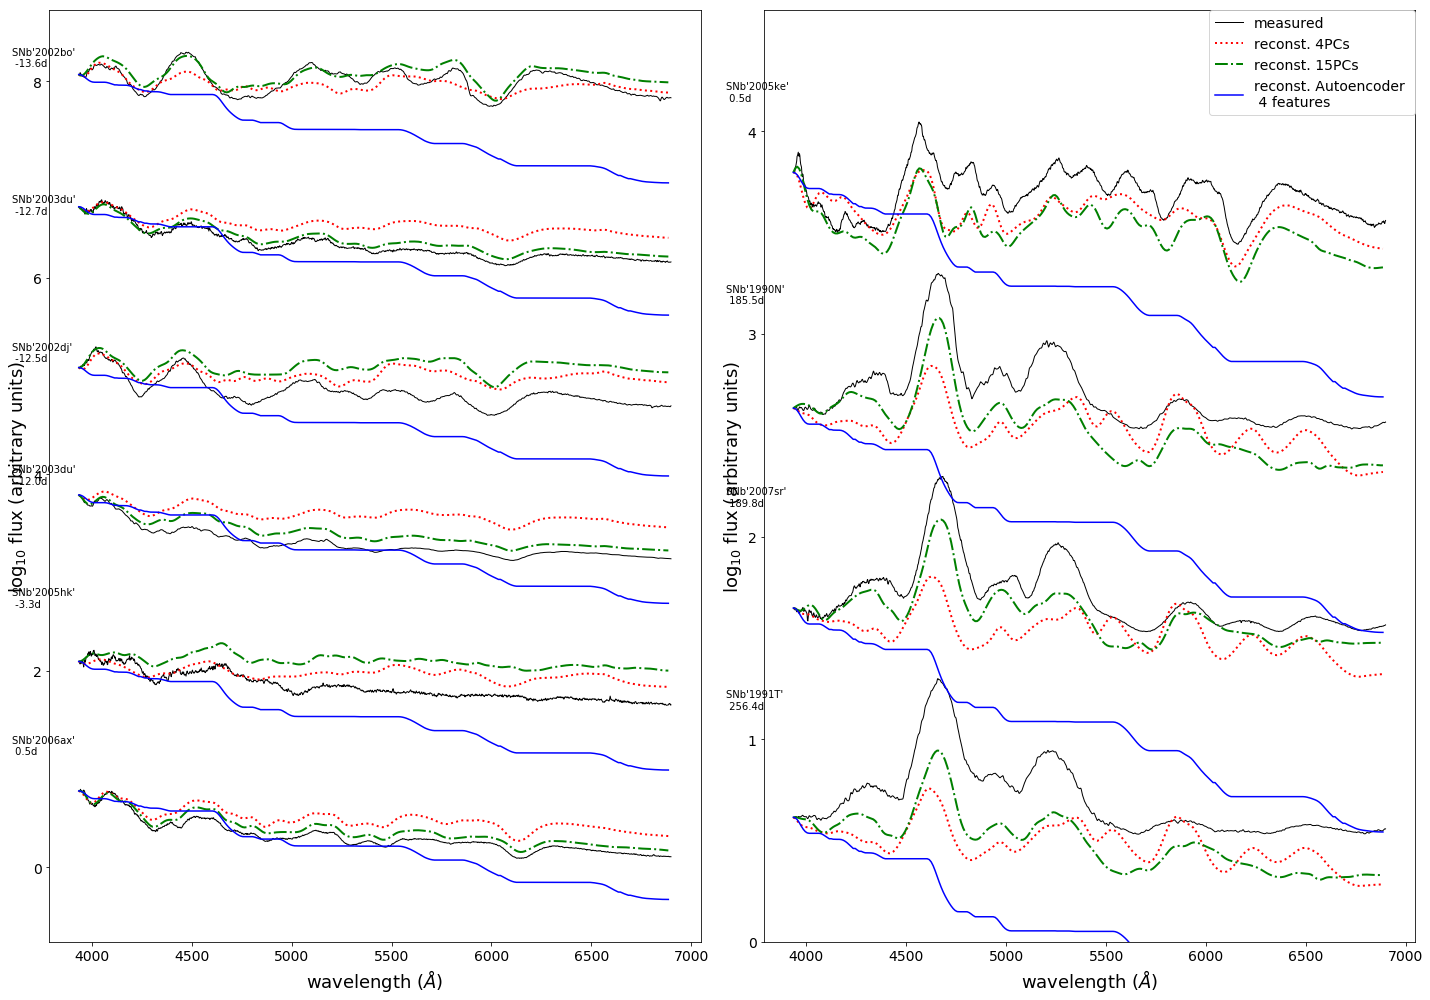

In [166]:


fig = plt.figure(figsize=(20,14))
plt.subplot(1,2,1)
plt.plot(wavelenght_array_flux, flux[range_to_plot[0]], color='black', lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[1]] + 1.5, color='black', lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[2]] + 3.0, color='black', lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[3]] + 4.5, color='black', lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[4]] + 6.0, color='black', lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[5]] + 7.5, color='black', lw=1.0)





plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[0]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[0]][0], color='red', ls=':', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[1]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[1]][0] + 1.5, color='red', ls=':', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[2]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[2]][0] + 3.0, color='red', ls=':', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[3]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[3]][0] + 4.5, color='red', ls=':', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[4]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[4]][0] + 6.0, color='red', ls=':', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[5]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[5]][0] + 7.5, color='red', ls=':', lw=2.0)






plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[0]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[0]][0], color='green', ls='-.', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[1]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[1]][0] + 1.5, color='green', ls='-.', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[2]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[2]][0] + 3.0, color='green', ls='-.', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[3]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[3]][0] + 4.5, color='green', ls='-.', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[4]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[4]][0] + 6.0, color='green', ls='-.', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[5]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[5]][0] + 7.5, color='green', ls='-.', lw=2.0)



plt.text(3600, 1.15, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[0]][2:],spectra_data['f3'][range_to_plot[0]]))
plt.text(3600, 1.15 + 1.5, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[1]][2:],spectra_data['f3'][range_to_plot[1]]))
plt.text(3600, 1.15 + 2.75, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[2]][2:],spectra_data['f3'][range_to_plot[2]]))
plt.text(3600, 1.15 + 4.0, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[3]][2:],spectra_data['f3'][range_to_plot[3]]))
plt.text(3600, 1.15 + 5.5, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[4]][2:],spectra_data['f3'][range_to_plot[4]]))
plt.text(3600, 1.15 + 7.0, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[5]][2:],spectra_data['f3'][range_to_plot[5]]))

plt.xlabel('wavelength ($\AA$)', fontsize=18)
plt.ylabel('$\log_{10}$ flux (arbitrary units)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)





plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[0]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[0]][0], color='blue', lw=1.5)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[1]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[1]][0] + 1.5, color='blue', lw=1.5)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[2]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[2]][0] + 3.0, color='blue', lw=1.5)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[3]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[3]][0] + 4.5, color='blue', lw=1.5)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[4]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[4]][0] + 6.0, color='blue', lw=1.5)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[5]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[5]][0] + 7.5, color='blue', lw=1.5)


axs = plt.subplot(1,2,2)
line,  = axs.plot(wavelenght_array_flux, flux[range_to_plot[6]] + 0.5, color='black', label=names[0], lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[7]] + 1.5, color='black', lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[8]] + 2.5, color='black', lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[9]] + 3.25, color='black', lw=1.0)

line,  = axs.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[6]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[6]][0] + 0.5, color='red', ls=':', lw=2.0, label=names[1])
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[7]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[7]][0] + 1.5, color='red', ls=':', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[8]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[8]][0] + 2.5, color='red', ls=':', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[9]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[9]][0] + 3.25, color='red', ls=':', lw=2.0)

line,  = axs.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[6]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[6]][0] + 0.5, color='green', ls='-.', lw=2.0, label=names[2])
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[7]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[7]][0] + 1.5, color='green', ls='-.', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[8]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[8]][0] + 2.5, color='green', ls='-.', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[9]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[9]][0] + 3.25, color='green', ls='-.', lw=2.0)

line,  = axs.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[6]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[6]][0] + 0.5, color='blue', lw=1.5, label=names[3])
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[7]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[7]][0] + 1.5, color='blue', lw=1.5)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[8]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[8]][0] + 2.5, color='blue', lw=1.5)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[9]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[9]][0] + 3.25, color='blue', lw=1.5)

plt.text(3600, 1.15, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[6]][2:],spectra_data['f3'][range_to_plot[6]]))
plt.text(3600, 1.15 + 1.0, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[7]][2:],spectra_data['f3'][range_to_plot[7]]))
plt.text(3600, 1.15 + 2.0, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[8]][2:],spectra_data['f3'][range_to_plot[8]]))
plt.text(3600, 1.15 + 3.0, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[9]][2:],spectra_data['f3'][range_to_plot[9]]))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('wavelength ($\AA$)', fontsize=18)
plt.ylabel('$\log_{10}$ flux (arbitrary units)', fontsize=18)
plt.ylim(0,4.6)

plt.tight_layout()
axs.legend(bbox_to_anchor=(1.010, 1.007), ncol=1, fontsize=14)
plt.savefig('rconstructions.pdf', format='pdf', dpi=1000)
plt.show()

# Tranfer learning

In [167]:
# make pca reduction(to   7 dimensions )

pca = PCA(n_components=7)
pca.fit(der)
X = pca.transform(der)
pred_PCA_7PC = (pca.inverse_transform(X))

In [168]:
X.shape

(3677, 7)

In [169]:
import pylab as plt
import numpy as np

# path to PCA reduced data
path_pca = X

# path to mask identifying spectra at max
path_mask = 'mask.dat'



In [170]:


data1 = [elem for elem in path_pca]

# construct data matrix
matrix = np.array([[float(item) for item in line] for line in data1])

# read mask
op2 = open(path_mask, 'r')
lin2 = op2.readlines()
op2.close()

labels = np.array([float(elem.split()[0]) for elem in lin2])

at_max = labels == 1.0
all_spec = labels == 0.0



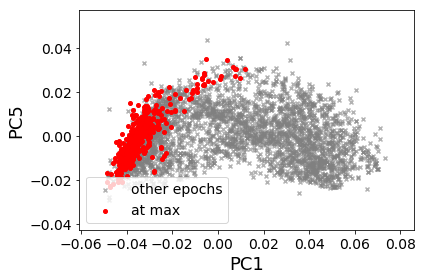

In [171]:
# plot PC1 and PC5
plt.figure()
plt.scatter(matrix[all_spec, 0], matrix[all_spec, 4], color='gray', alpha=0.6, marker='x', s=16, label='other epochs')
plt.scatter(matrix[at_max,0], matrix[at_max,4], color='red', marker='o', s=16, label='at max')
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC5', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='lower left')
plt.tight_layout()
plt.savefig('transfer_learning_scatter.pdf', format='pdf', dpi=1000)